In [1]:
import pandas as pd

In [2]:
from sklearn.model_selection import train_test_split
import xgboost
import shap
import numpy as np
import matplotlib.pylab as pl

# print the JS visualization code to the notebook
shap.initjs()

In [3]:
#read the data
df=pd.read_csv("afv_N.csv")


In [4]:
X = df.drop('AFV',axis=1)
y = df['AFV']

In [5]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.30, random_state=7)
d_train = xgboost.DMatrix(X_train, label=y_train)
d_test = xgboost.DMatrix(X_test, label=y_test)

In [6]:
params = {
    "eta": 0.01,
    "objective": "binary:logistic",
    "subsample": 0.5,
    "base_score": np.mean(y_train),
    "eval_metric": "logloss"
}
model = xgboost.train(params, d_train, 5000, evals = [(d_test, "test")], verbose_eval=100, early_stopping_rounds=20)

[0]	test-logloss:0.41072
[100]	test-logloss:0.39831
[174]	test-logloss:0.39778


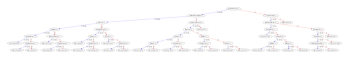

In [7]:
xgboost.plot_tree(model)
import matplotlib.pyplot as plt
plt.show()

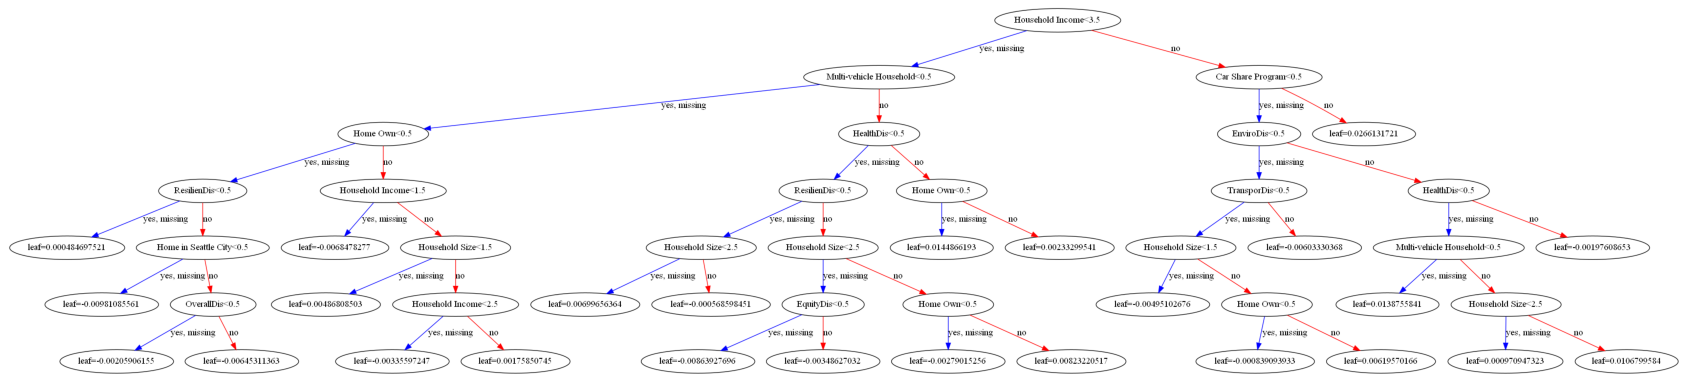

In [36]:
fig, ax = plt.subplots(figsize=(30, 30))
xgboost.plot_tree(model, ax=ax)
plt.show()

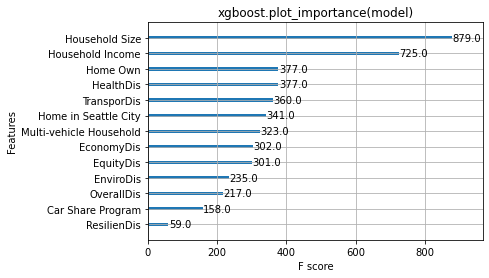

In [8]:
xgboost.plot_importance(model)
pl.title("xgboost.plot_importance(model)")
pl.show()

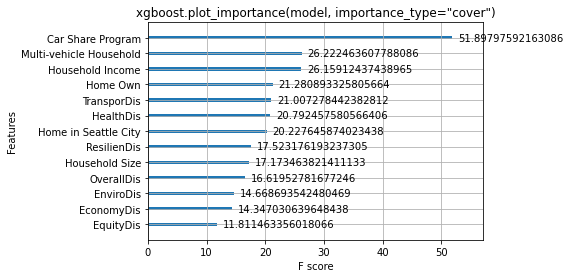

In [38]:
xgboost.plot_importance(model, importance_type="cover")
pl.title('xgboost.plot_importance(model, importance_type="cover")')
pl.show()

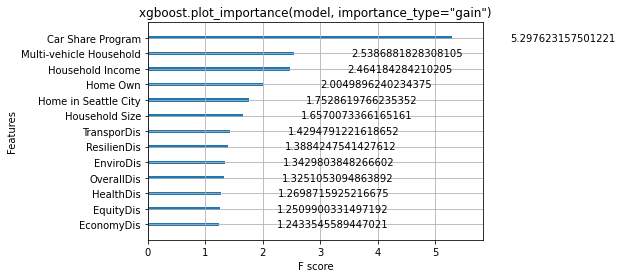

In [9]:
xgboost.plot_importance(model, importance_type="gain")
pl.title('xgboost.plot_importance(model, importance_type="gain")')
pl.show()

In [10]:
explainer = shap.TreeExplainer(model)
shap_values = explainer.shap_values(X)

In [11]:
shap.force_plot(explainer.expected_value, shap_values[0,:], X.iloc[0,:])

In [12]:
shap.force_plot(explainer.expected_value, shap_values[:2231,:], X.iloc[:2231,:])


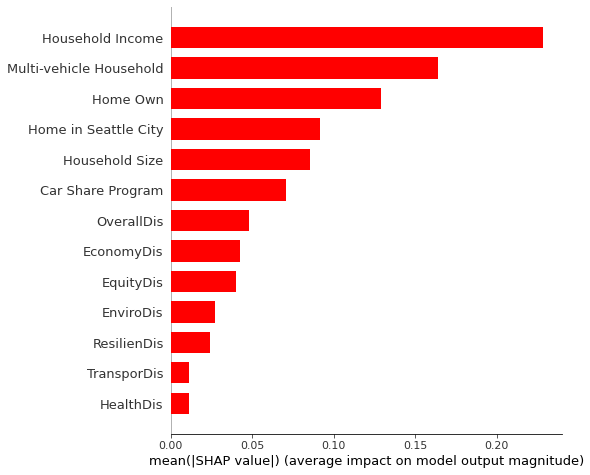

In [43]:
shap.summary_plot(shap_values, X, plot_type="bar",color="red")

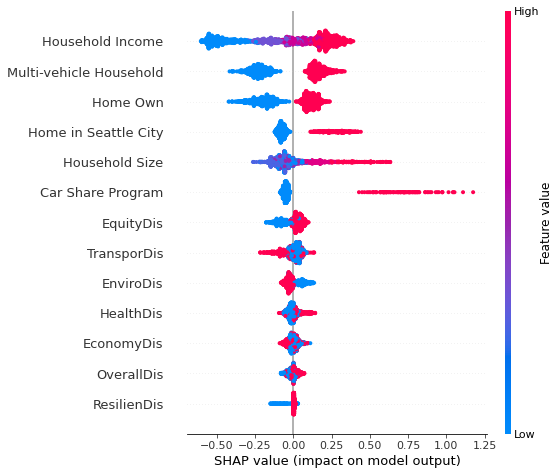

In [13]:
shap.summary_plot(shap_values, X)

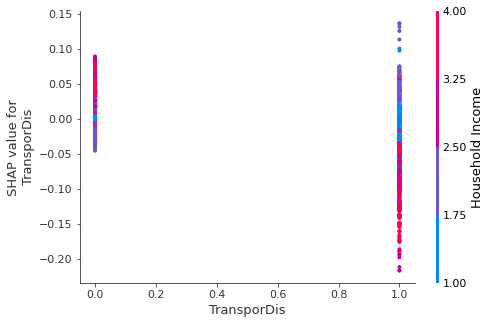

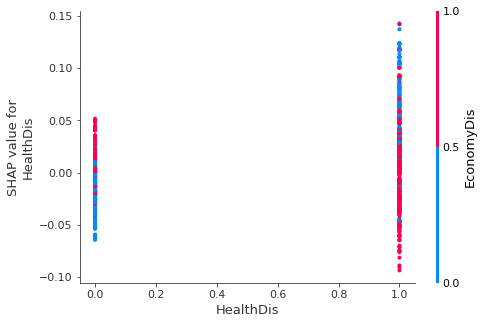

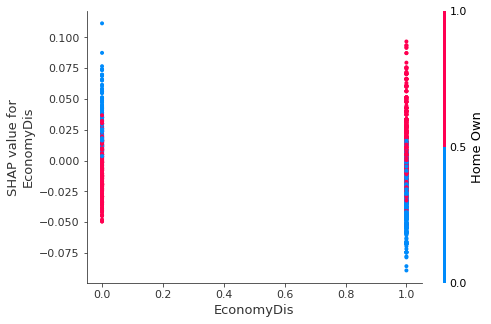

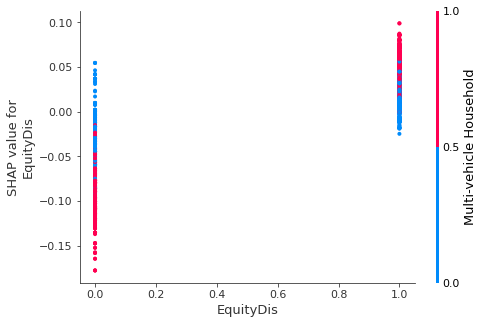

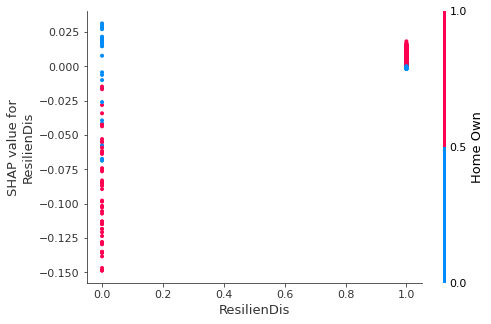

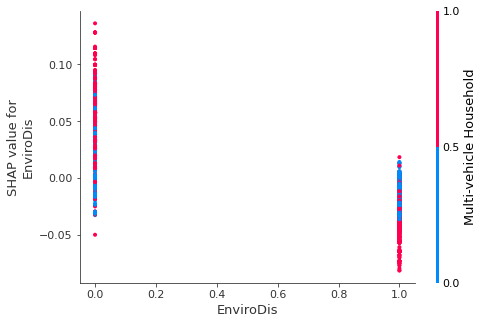

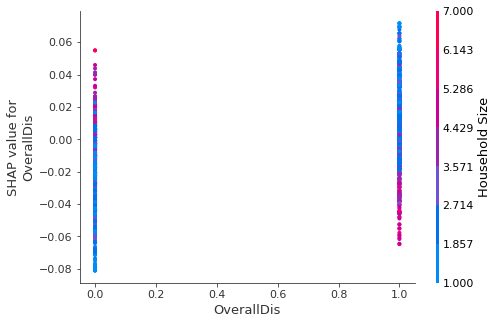

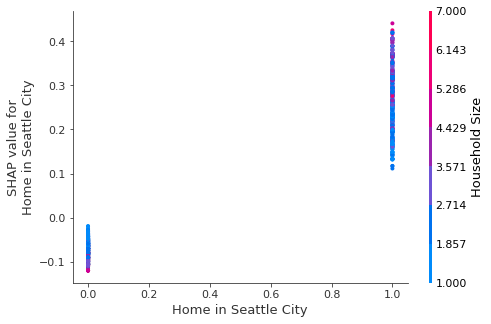

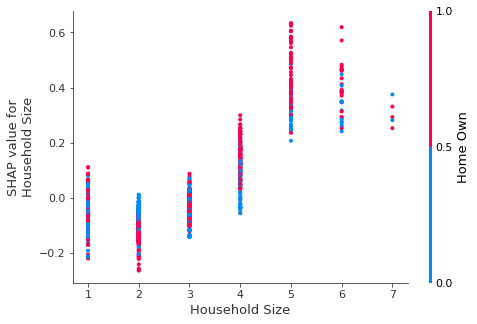

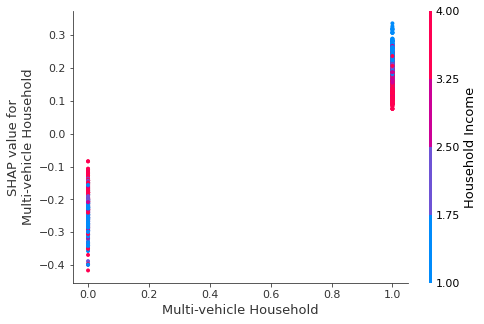

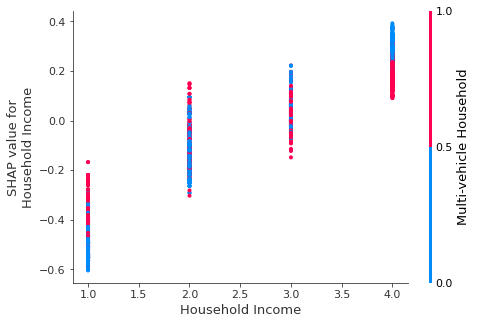

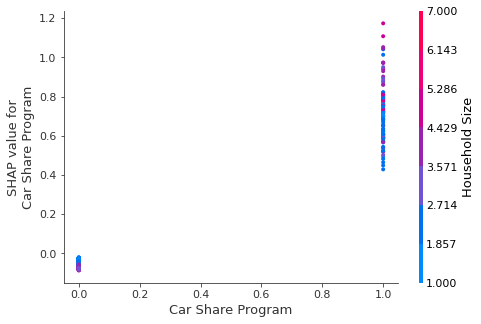

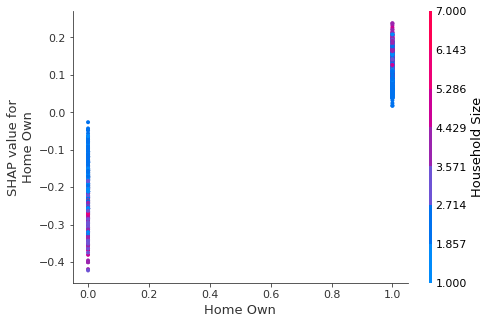

In [14]:
for name in X_train.columns:
    shap.dependence_plot(name, shap_values, X, display_features=X)

In [21]:
import shap
import matplotlib.pyplot as plt
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.feature_selection import RFE
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import BaggingClassifier
from sklearn.tree import DecisionTreeClassifier
from xgboost.sklearn import XGBClassifier
from xgboost.sklearn import XGBRegressor
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score
from sklearn.preprocessing import LabelBinarizer

In [22]:
# =============================================================================
# Make model predictions
# =============================================================================
# Make predictions with model
pred_class = model.predict(d_test)
pred_probs = model.predict_proba(d_test)

AttributeError: 'Booster' object has no attribute 'predict_proba'

In [24]:
def confusion_matrix_eval(Y_truth, Y_pred):
    from sklearn.metrics import confusion_matrix, classification_report
    cm = confusion_matrix(y_test, pred_class)
    cr = classification_report(y_test, pred_class)
    print("-"*90)
    print("[CLASS_REPORT] printing classification report to console")
    print("-"*90)
    print(cr)
    print("-"*90)
    return [cm, cr]

cm = confusion_matrix_eval(y_test, pred_class)

ValueError: Classification metrics can't handle a mix of binary and continuous targets

In [25]:
# train-test split evaluation of xgboost model

from xgboost import XGBClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score

# fit model no training data
model = XGBClassifier()
model.fit(X_train, y_train)
# make predictions for test data
y_pred = model.predict(X_test)
predictions = [round(value) for value in y_pred]
# evaluate predictions
accuracy = accuracy_score(y_test, predictions)
print("Accuracy: %.2f%%" % (accuracy * 100.0))

Accuracy: 83.28%


In [28]:
# k-fold cross validation evaluation of xgboost model

import xgboost
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score

# CV model
model = xgboost.XGBClassifier()
kfold = KFold(n_splits=10, random_state=7, shuffle=True)
results = cross_val_score(model, X, y, cv=kfold)
print("Accuracy: %.2f%% (%.2f%%)" % (results.mean()*100, results.std()*100))

Accuracy: 83.10% (2.34%)


`eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.


[0]	validation_0-error:0.13197	validation_0-logloss:0.55232	validation_1-error:0.15224	validation_1-logloss:0.56417
[1]	validation_0-error:0.13325	validation_0-logloss:0.47507	validation_1-error:0.15075	validation_1-logloss:0.49521
[2]	validation_0-error:0.13133	validation_0-logloss:0.42829	validation_1-error:0.15224	validation_1-logloss:0.45655
[3]	validation_0-error:0.13004	validation_0-logloss:0.39911	validation_1-error:0.15373	validation_1-logloss:0.43510
[4]	validation_0-error:0.13069	validation_0-logloss:0.37971	validation_1-error:0.15224	validation_1-logloss:0.42359
[5]	validation_0-error:0.13004	validation_0-logloss:0.36742	validation_1-error:0.15224	validation_1-logloss:0.41536
[6]	validation_0-error:0.12940	validation_0-logloss:0.35801	validation_1-error:0.15224	validation_1-logloss:0.41319
[7]	validation_0-error:0.12876	validation_0-logloss:0.34999	validation_1-error:0.15224	validation_1-logloss:0.41392
[8]	validation_0-error:0.12876	validation_0-logloss:0.34421	validation_1

[71]	validation_0-error:0.09609	validation_0-logloss:0.23693	validation_1-error:0.16269	validation_1-logloss:0.47953
[72]	validation_0-error:0.09673	validation_0-logloss:0.23636	validation_1-error:0.16269	validation_1-logloss:0.48236
[73]	validation_0-error:0.09609	validation_0-logloss:0.23616	validation_1-error:0.16269	validation_1-logloss:0.48317
[74]	validation_0-error:0.09609	validation_0-logloss:0.23579	validation_1-error:0.16269	validation_1-logloss:0.48452
[75]	validation_0-error:0.09545	validation_0-logloss:0.23497	validation_1-error:0.16269	validation_1-logloss:0.48518
[76]	validation_0-error:0.09609	validation_0-logloss:0.23458	validation_1-error:0.16269	validation_1-logloss:0.48697
[77]	validation_0-error:0.09481	validation_0-logloss:0.23396	validation_1-error:0.16418	validation_1-logloss:0.48753
[78]	validation_0-error:0.09481	validation_0-logloss:0.23313	validation_1-error:0.16716	validation_1-logloss:0.48890
[79]	validation_0-error:0.09417	validation_0-logloss:0.23228	val

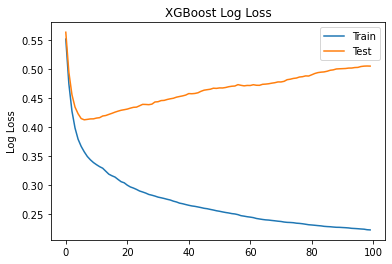

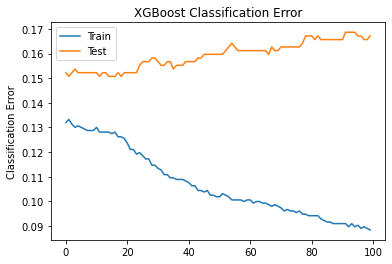

In [29]:
# plot learning curve
from numpy import loadtxt
from xgboost import XGBClassifier
from sklearn.metrics import accuracy_score
from matplotlib import pyplot

# fit model no training data
model = XGBClassifier()
eval_set = [(X_train, y_train), (X_test, y_test)]
model.fit(X_train, y_train, eval_metric=["error", "logloss"], eval_set=eval_set, verbose=True)
# make predictions for test data
y_pred = model.predict(X_test)
predictions = [round(value) for value in y_pred]
# evaluate predictions
accuracy = accuracy_score(y_test, predictions)
print("Accuracy: %.2f%%" % (accuracy * 100.0))
# retrieve performance metrics
results = model.evals_result()
epochs = len(results['validation_0']['error'])
x_axis = range(0, epochs)
# plot log loss
fig, ax = pyplot.subplots()
ax.plot(x_axis, results['validation_0']['logloss'], label='Train')
ax.plot(x_axis, results['validation_1']['logloss'], label='Test')
ax.legend()
pyplot.ylabel('Log Loss')
pyplot.title('XGBoost Log Loss')
pyplot.show()
# plot classification error
fig, ax = pyplot.subplots()
ax.plot(x_axis, results['validation_0']['error'], label='Train')
ax.plot(x_axis, results['validation_1']['error'], label='Test')
ax.legend()
pyplot.ylabel('Classification Error')
pyplot.title('XGBoost Classification Error')
pyplot.show()